In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from termcolor import colored

In [ ]:
for i in range(n_class):
    display(cmap)
    print("R:{}\nG:{}\nB:{}".format(cmap(i)[0],cmap(i)[1],cmap(i)[2]))

(-1.2, 1.2)

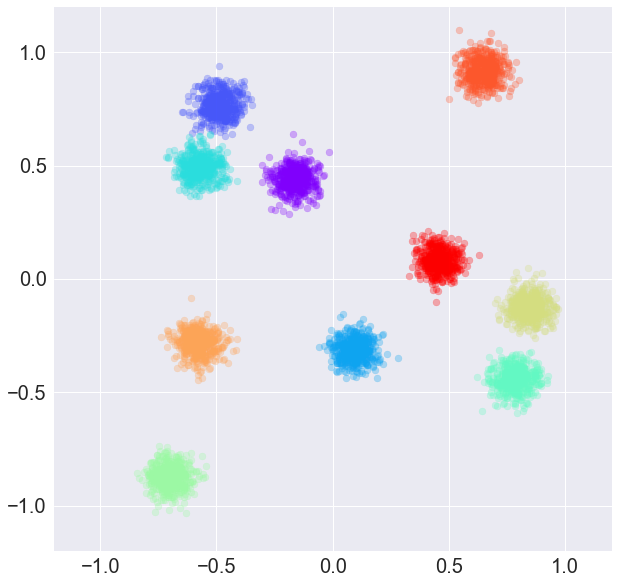

In [39]:
#basic setting
np.random.seed(1)
plt.style.use("seaborn")
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20

#Dataset Generation
n_class, n_data = 10,500
noise = 0.05

x_data = np.empty(shape = (0,2)) #each data example has two features
y_data = np.empty(shape = (0,1)) #10 different labels

cmap = cm.get_cmap("rainbow", lut = n_class)
fig,ax = plt.subplots(figsize = (10,10))

for class_indx in range(n_class):
    #random center of a single class
    center = np.random.uniform(-1,1, (2,)) 
    
    #generate 500 data example with noise added
    x1_data = center[0] + noise * np.random.normal(0,1,(n_data,1))
    x2_data = center[1] + noise * np.random.normal(0,1,(n_data,1))
    
    #horizontal concate of two single column stack
    class_x_data = np.hstack((x1_data,x2_data))
    #class labels
    class_y_data = class_indx * np.ones((n_data,1))
    
    #vertical stack of both x and y data into x_data and y_data
    x_data = np.vstack((x_data,class_x_data)).astype(np.float32)
    y_data = np.vstack((y_data,class_y_data)).astype(np.int32)
    
    ax.scatter(x1_data,x2_data, color = cmap(class_indx), alpha = 0.3)
    
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
    

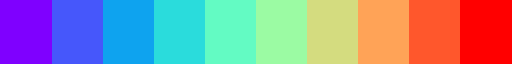

R:0.5
G:0.0
B:1.0


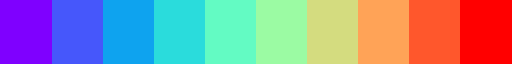

R:0.2777777777777778
G:0.3420201433256687
B:0.984807753012208


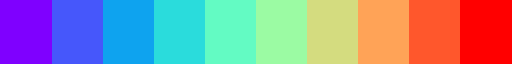

R:0.05555555555555558
G:0.6427876096865393
B:0.9396926207859084


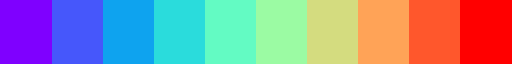

R:0.16666666666666663
G:0.8660254037844386
B:0.8660254037844387


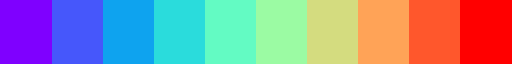

R:0.38888888888888884
G:0.984807753012208
B:0.7660444431189781


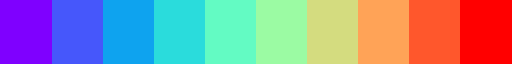

R:0.6111111111111112
G:0.984807753012208
B:0.6427876096865394


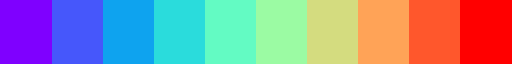

R:0.8333333333333333
G:0.8660254037844388
B:0.5000000000000001


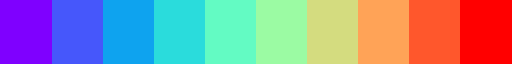

R:1.0
G:0.6427876096865395
B:0.3420201433256688


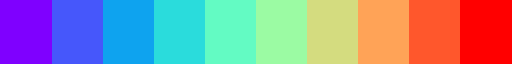

R:1.0
G:0.3420201433256689
B:0.17364817766693041


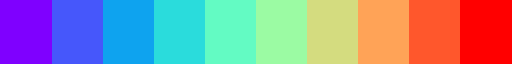

R:1.0
G:1.2246467991473532e-16
B:6.123233995736766e-17


In [93]:
for i in range(n_class):
    display(cmap)
    print("R:{}\nG:{}\nB:{}".format(cmap(i)[0],cmap(i)[1],cmap(i)[2]))

In [56]:
# Convert to tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_data,y_data))
train_ds = train_ds.shuffle(1000).batch(8)


#define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units = n_class))
model.add(Activation("softmax"))

#instantiate training object
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Mean,SparseCategoricalAccuracy

loss_object = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.01)
train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

#define training
@tf.function
def train():
    global train_ds, model, loss_object, optimizer
    global train_loss, train_acc
    
    for inputs,labels in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(inputs)
            loss = loss_object(labels,predictions)
            
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        train_loss(loss)
        train_acc(labels, predictions) 

#define result reporter
def training_reporter():
    global epoch
    global train_loss, train_acc
    
    print(colored("EPOCH {}".format(epoch+1), "blue", "on_cyan"))
    template = "Train Loss:{:.4f}\tTrain Acc:{:2f}%"
    print(template.format(train_loss.result(),train_acc.result()*100))
    
    #reset train_loss, train_acc for next epoch
    train_loss.reset_states()
    train_acc.reset_states()

In [57]:
# Actual Training

EPOCH = 30
for epoch in range(EPOCH):
    train()
    training_reporter()

EPOCH 1
Train Loss:1.2672	Train Acc:58.660000%
EPOCH 2
Train Loss:0.9344	Train Acc:67.040001%
EPOCH 3
Train Loss:0.7355	Train Acc:78.080002%
EPOCH 4
Train Loss:0.6141	Train Acc:85.839996%
EPOCH 5
Train Loss:0.5118	Train Acc:89.880005%
EPOCH 6
Train Loss:0.4385	Train Acc:92.820000%
EPOCH 7
Train Loss:0.3794	Train Acc:95.000000%
EPOCH 8
Train Loss:0.3256	Train Acc:96.220001%
EPOCH 9
Train Loss:0.2883	Train Acc:96.820000%
EPOCH 10
Train Loss:0.2525	Train Acc:97.419998%
EPOCH 11
Train Loss:0.2213	Train Acc:98.040001%
EPOCH 12
Train Loss:0.1965	Train Acc:98.580002%
EPOCH 13
Train Loss:0.1753	Train Acc:98.720001%
EPOCH 14
Train Loss:0.1569	Train Acc:99.019997%
EPOCH 15
Train Loss:0.1401	Train Acc:99.159996%
EPOCH 16
Train Loss:0.1251	Train Acc:99.419998%
EPOCH 17
Train Loss:0.1133	Train Acc:99.680000%
EPOCH 18
Train Loss:0.1028	Train Acc:99.659996%
EPOCH 19
Train Loss:0.0928	Train Acc:99.659996%
EPOCH 20
Train Loss:0.0851	Train Acc:99.779999%
EPOCH 21
Train Loss:0.0767	Train Acc:99.860001%
E

(10000,) (10000,)
(10000, 2)
y_test: (10000, 10)
predictions: (10000,)


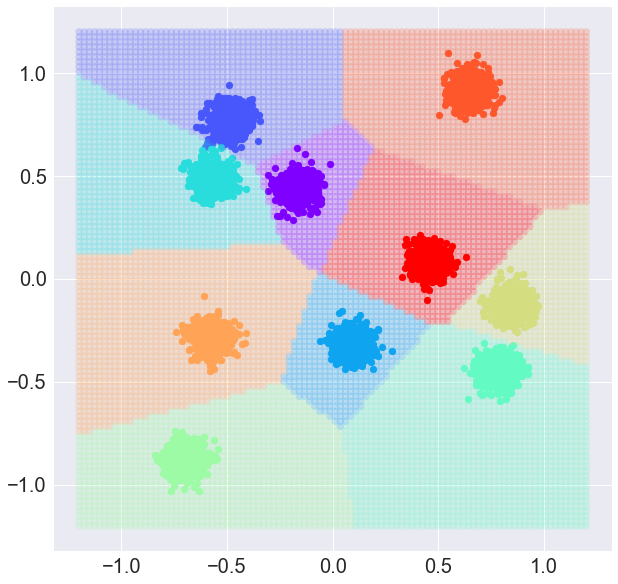

In [100]:
# visualize the result boundaries
x1_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)
x2_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)

X1,X2 = np.meshgrid(x1_test,x2_test)
x1_test, x2_test = X1.flatten(), X2.flatten()
print(x1_test.shape,x2_test.shape)

x_test = np.hstack((x1_test.reshape(-1,1),x2_test.reshape(-1,1)))
print(x_test.shape)

#logits of each class
y_test = model(x_test).numpy()
print("y_test:", y_test.shape)

#predictions, axis = 1 destroy columns
predictions = np.argmax(y_test, axis= 1)
print("predictions:", predictions.shape)

cdict = {i:cmap(i) for i in range(n_class)}
color_arr = [cdict[pred] for pred in predictions]

fix, ax = plt.subplots(figsize = (10,10))
for class_indx in range(n_class):
    ax.scatter(x_data[class_indx*n_data:(class_indx+1)*n_data,0],
               x_data[class_indx*n_data:(class_indx+1)*n_data,1], color = cmap(class_indx))
    
ax.scatter(x1_test, x2_test, 
           c = color_arr, 
           alpha = 0.2) 

# Model with additional layers

In [103]:
# Convert to tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_data,y_data))
train_ds = train_ds.shuffle(1000).batch(8)


#define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dense(units = 128))
model.add(Activation("relu"))
model.add(Dense(units = 64))
model.add(Activation("relu"))
model.add(Dense(units = 32))
model.add(Activation("relu"))
model.add(Dense(units = n_class))
model.add(Activation("softmax"))

#instantiate training object
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Mean,SparseCategoricalAccuracy

loss_object = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.01)
train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

#define training
@tf.function
def train():
    global train_ds, model, loss_object, optimizer
    global train_loss, train_acc
    
    for inputs,labels in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(inputs)
            loss = loss_object(labels,predictions)
            
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        train_loss(loss)
        train_acc(labels, predictions) 

#define result reporter
def training_reporter():
    global epoch
    global train_loss, train_acc
    
    print(colored("EPOCH {}".format(epoch+1), "blue", "on_cyan"))
    template = "Train Loss:{:.4f}\tTrain Acc:{:2f}%"
    print(template.format(train_loss.result(),train_acc.result()*100))
    
    #reset train_loss, train_acc for next epoch
    train_loss.reset_states()
    train_acc.reset_states()
    
# Actual Training

EPOCH = 30
for epoch in range(EPOCH):
    train()
    training_reporter()

EPOCH 1
Train Loss:0.4698	Train Acc:91.879997%
EPOCH 2
Train Loss:0.0902	Train Acc:97.739998%
EPOCH 3
Train Loss:0.0634	Train Acc:98.619995%
EPOCH 4
Train Loss:0.0733	Train Acc:98.239998%
EPOCH 5
Train Loss:0.1591	Train Acc:97.619995%
EPOCH 6
Train Loss:0.0175	Train Acc:99.580002%
EPOCH 7
Train Loss:0.0428	Train Acc:99.260002%
EPOCH 8
Train Loss:0.0351	Train Acc:99.080002%
EPOCH 9
Train Loss:0.0204	Train Acc:99.500000%
EPOCH 10
Train Loss:0.0580	Train Acc:99.199997%
EPOCH 11
Train Loss:0.0444	Train Acc:99.360001%
EPOCH 12
Train Loss:0.0380	Train Acc:99.379997%
EPOCH 13
Train Loss:0.0024	Train Acc:99.900002%
EPOCH 14
Train Loss:0.0157	Train Acc:99.639999%
EPOCH 15
Train Loss:0.0289	Train Acc:99.479996%
EPOCH 16
Train Loss:0.0100	Train Acc:99.760002%
EPOCH 17
Train Loss:0.0070	Train Acc:99.820000%
EPOCH 18
Train Loss:0.0110	Train Acc:99.779999%
EPOCH 19
Train Loss:0.0087	Train Acc:99.779999%
EPOCH 20
Train Loss:0.0073	Train Acc:99.820000%
EPOCH 21
Train Loss:0.0032	Train Acc:99.879997%
E

(10000,) (10000,)
(10000, 2)
y_test: (10000, 10)
predictions: (10000,)


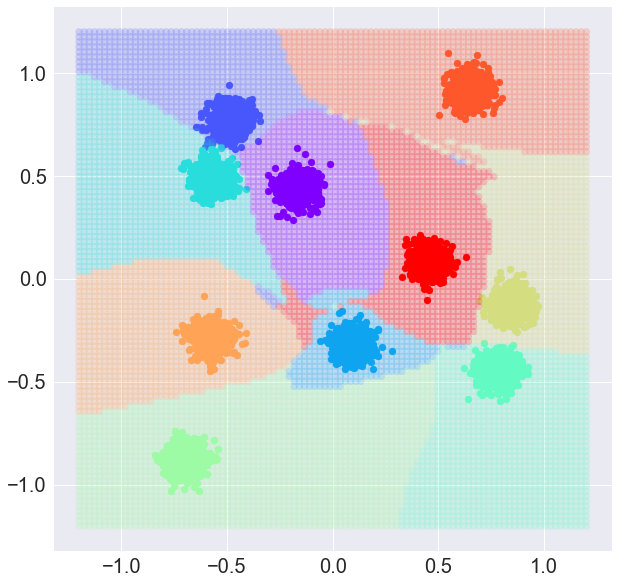

In [104]:
# visualize the result boundaries
x1_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)
x2_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)

X1,X2 = np.meshgrid(x1_test,x2_test)
x1_test, x2_test = X1.flatten(), X2.flatten()
print(x1_test.shape,x2_test.shape)

x_test = np.hstack((x1_test.reshape(-1,1),x2_test.reshape(-1,1)))
print(x_test.shape)

#logits of each class
y_test = model(x_test).numpy()
print("y_test:", y_test.shape)

#predictions, axis = 1 destroy columns
predictions = np.argmax(y_test, axis= 1)
print("predictions:", predictions.shape)

cdict = {i:cmap(i) for i in range(n_class)}
color_arr = [cdict[pred] for pred in predictions]

fix, ax = plt.subplots(figsize = (10,10))
for class_indx in range(n_class):
    ax.scatter(x_data[class_indx*n_data:(class_indx+1)*n_data,0],
               x_data[class_indx*n_data:(class_indx+1)*n_data,1], color = cmap(class_indx))
    
ax.scatter(x1_test, x2_test, 
           c = color_arr, 
           alpha = 0.2) 